## Задача

Фильмовый хостинг: imdb.com

1. Распарсите страницу с определенной категорией фильмов.
2. Достаньте следующую информацию (разумеется та, которая присутствует на вашем сайте):
  * оценки для каждого фильма,
  * бюджет фильма, 
  * сборы в США или мире,
  * продолжительность фильма,
  * режисер,
  * сюжет или описание.
3. Воспользуйтесь своим кодом и распарсите странице другой категории, достав те же параметры.
4. Сравните фильмы из двух категорий: где больше средний рейтинг, каково распределение оценок, где выше бюджет/кассовость? Где больше средняя продолжительность (постройте распределения по продолжительности в 2 категориях)?

В каждой категории нужно достать минимум 25-30 фильмов.

**ВАЖНО!** Помните о том, что необходимо "замедлять" запросы к сервису, производить запросы из ранее указанных браузерных конфигураций.

https://www.imdb.com/search/title/?genres=comedy

In [1]:
!pip install selenium

In [2]:
import selenium

In [3]:
from selenium import webdriver
from bs4 import BeautifulSoup
import requests

In [4]:
driver = webdriver.Chrome('C:/Users/pro10/Downloads/chromedriver_win32/chromedriver.exe')

In [5]:
def get_soup(url):
    driver.get(url)
    return BeautifulSoup(driver.page_source)

In [51]:
url = 'https://www.imdb.com/search/title/?genres=animation'

soup = get_soup(url)

In [58]:
film_list1 = []
for div in soup.find_all('div', class_ = "lister-item-content"):
    title = div.find('h3').a.text
    try:
        time = div.find('span', class_ = "runtime").text.split(' ')[0]
    except:
        time = None
    try:
        rate = div.find('div', class_ = "inline-block ratings-imdb-rating").strong.text.replace(',', '.')
    except:
        rate = None
    desc = div.find_all('p', class_ = 'text-muted')[1].text.strip()
    try:
        votes = div.find('p', class_ = 'sort-num_votes-visible').find('span', attrs={'name' : "nv"}).text.replace(u'\xa0', '')
    except:
        votes = None
    film_list1.append((title, time, rate, desc, votes))

In [59]:
print(film_list1[:5])

[('Звёздные войны: Войны Клонов', '23', '8.1', 'Jedi Knights lead the Grand Army of the Republic against the droid army of the Separatists.', '44555'), ('Рик и Морти', '23', '9.3', 'An animated series that follows the exploits of a super scientist and his not-so-bright grandson.', '318157'), ('Холодное сердце 2', '103', '7.2', "Anna, Elsa, Kristoff, Olaf and Sven leave Arendelle to travel to an ancient, autumn-bound forest of an enchanted land. They set out to find the origin of Elsa's powers in order to save their kingdom.", '62297'), ('Симпсоны', '22', '8.7', 'The satiric adventures of a working-class family in the misfit city of Springfield.', '345506'), ('Король Лев', '118', '7.0', 'After the murder of his father, a young lion prince flees his kingdom only to learn the true meaning of responsibility and bravery.', '158375')]


In [62]:
url = 'https://www.imdb.com/search/title/?genres=biography' 

soup = get_soup(url)

In [63]:
film_list2 = []
for div in soup.find_all('div', class_ = "lister-item-content"):
    title = div.find('h3').a.text
    try:
        time = div.find('span', class_ = "runtime").text.split(' ')[0]
    except:
        time = None
    try:
        rate = div.find('div', class_ = "inline-block ratings-imdb-rating").strong.text.replace(',', '.')
    except:
        rate = None
    desc = div.find_all('p', class_ = 'text-muted')[1].text.strip()
    try:
        votes = div.find('p', class_ = 'sort-num_votes-visible').find('span', attrs={'name' : "nv"}).text.replace(u'\xa0', '')
    except:
        votes = None
    film_list2.append((title, time, rate, desc, votes))

In [64]:
print(film_list2[:5])

[('Ирландец', '209', '8.0', 'A mob hitman recalls his friend Jimmy Hoffa.', '217365'), ('Скандал', '109', '6.8', 'A group of women take on Fox News head Roger Ailes and the toxic atmosphere he presided over at the network.', '21992'), ('Ford против Ferrari', '152', '8.2', 'American car designer Carroll Shelby and driver Ken Miles battle corporate interference, the laws of physics and their own personal demons to build a revolutionary race car for Ford and challenge Ferrari at the 24 Hours of Le Mans in 1966.', '102091'), ('Тёмные воды', '126', '7.6', 'A corporate defense attorney takes on an environmental lawsuit against a chemical company that exposes a lengthy history of pollution.', '8218'), ('Два Папы', '125', '7.6', 'Behind Vatican walls, the conservative Pope Benedict and the liberal future Pope Francis must find common ground to forge a new path for the Catholic Church.', '59819')]


In [65]:
import pandas as pd
import numpy as np

In [66]:
df1 = pd.DataFrame(film_list1, columns =['Название', 'Продолжительность', 'Рейтинг', 'Описание','Оценки'])

In [67]:
df1 = df1.replace(to_replace='None', value=np.nan).dropna()
df1.head()

,Название,Продолжительность,Рейтинг,Описание,Оценки
0,Звёздные войны: Войны Клонов,23,8.1,Jedi Knights lead the Grand Army of the Republ...,44555
1,Рик и Морти,23,9.3,An animated series that follows the exploits o...,318157
2,Холодное сердце 2,103,7.2,"Anna, Elsa, Kristoff, Olaf and Sven leave Aren...",62297
3,Симпсоны,22,8.7,The satiric adventures of a working-class fami...,345506
4,Король Лев,118,7.0,"After the murder of his father, a young lion p...",158375


In [68]:
df2= pd.DataFrame(film_list2,columns=['Название', 'Продолжительность', 'Рейтинг', 'Описание','Оценки'])

In [82]:
df2 = df2.replace(to_replace='None', value=np.nan).dropna()
df2.head()

,Название,Продолжительность,Рейтинг,Описание,Оценки
0,Ирландец,209,8.0,A mob hitman recalls his friend Jimmy Hoffa.,217365
1,Скандал,109,6.8,A group of women take on Fox News head Roger A...,21992
2,Ford против Ferrari,152,8.2,American car designer Carroll Shelby and drive...,102091
3,Тёмные воды,126,7.6,A corporate defense attorney takes on an envir...,8218
4,Два Папы,125,7.6,"Behind Vatican walls, the conservative Pope Be...",59819


In [71]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [75]:
rate_a = np.mean(df1['Рейтинг'].astype(float))
rate_b = np.mean(df2['Рейтинг'].astype(float))

In [76]:
if rate_a > rate_b:
    print('Средняя оценка анимационных фильмов больше')
else:
    print('Средняя оценка биографических фильмов больше')

Средняя оценка анимационных фильмов больше


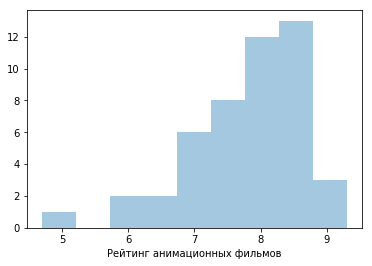

In [86]:
sns.distplot(df1['Рейтинг'].astype(float), kde=False, axlabel='Рейтинг анимационных фильмов')

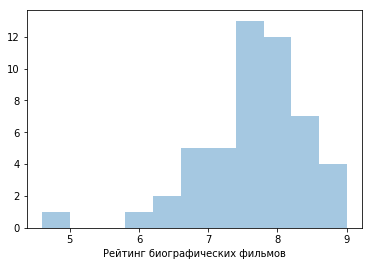

In [87]:
sns.distplot(df2['Рейтинг'].astype(float), kde=False, axlabel='Рейтинг биографических фильмов')

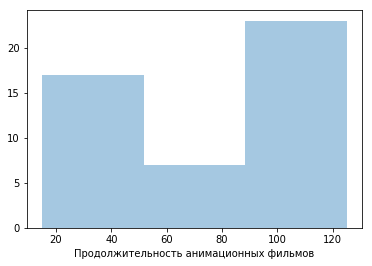

In [88]:
sns.distplot(df1['Продолжительность'].astype(int), kde=False, axlabel='Продолжительность анимационных фильмов')

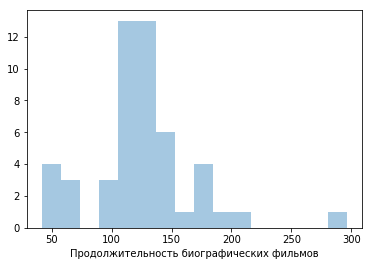

In [89]:
sns.distplot(df2['Продолжительность'].astype(int), kde=False, axlabel='Продолжительность биографических фильмов')